# D-Scaling Experiment: A Thermodynamic Perspective

## Core Functionality & Visualization
This script analyzes the D-Scaling phenomenon through the lens of the Path Integral Physics Theory. It integrates **reducible metrics calculation** for high-quality curve fitting and uses a visualization style that emulates top-tier academic conference publications.

1.  **Loss Trend**: Tracks and fits the reducible component of the final test loss (Power Law).
2.  **Cognitive Internal Energy (U) Trend**: Tracks and fits the reducible component of the system's internal energy (Power Law).
3.  **Cognitive Entropy (S) Trend**: Tracks and fits the reducible component of the system's entropy (Exponential Decay).
4.  **U/F Ratio Trend**: Calculates and plots the ratio of Cognitive Internal Energy (U) to Cognitive Free Energy (F), which is now directly computed. This ratio serves as a computable proxy for Kolmogorov Complexity.

In [1]:
# Ensure the dataset is available locally.
from torchvision import datasets, transforms
try:
    datasets.FashionMNIST('./data', train=True, download=True, transform=transforms.ToTensor())
    datasets.FashionMNIST('./data', train=False, download=True, transform=transforms.ToTensor())
    print("FashionMNIST dataset is ready.")
except Exception as e:
    print(f"Could not download dataset. Error: {e}")

FashionMNIST dataset is ready.


In [2]:
import sys
import os

# Add the experiment's directory to the Python path
workspace_path = "./workspace" # Please adjust this path according to your setup
if workspace_path not in sys.path:
    sys.path.append(workspace_path)
    print(f"Added path: {workspace_path}")
else:
    print(f"Path {workspace_path} is already in the Python path")

# Confirm the existence of the logic module file
file_path = os.path.join(workspace_path, "VIT_D_logic.py") # Find and replace with the logic module for the desired model
if os.path.exists(file_path):
    print(f"✓ File exists: {file_path}")
else:
    print(f"✗ File not found: {file_path}")

# Attempt to import the module
try:
    import VIT_D_logic # Replace with the logic module for the desired model
    print("✓ Module imported successfully!")
    
    # Check for the presence of the necessary function
    if hasattr(VIT_D_logic, 'run_training_task'):
        print("✓ Found function: run_training_task")
        run_training_task = VIT_D_logic.run_training_task
    else:
        print("✗ Function not found: run_training_task")
        
except ImportError as e:
    print(f"✗ Import failed: {e}")
    print("Attempting alternative import method...")
    
    # Use importlib as a fallback
    try:
        import importlib.util
        spec = importlib.util.spec_from_file_location("VIT_D_logic", file_path)
        VIT_D_logic = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(VIT_D_logic)
        print("✓ Successfully imported using importlib")

        if hasattr(VIT_D_logic, 'run_training_task'):
            print("✓ Found function: run_training_task")
            run_training_task = VIT_D_logic.run_training_task
        else:
            print("✗ Function not found: run_training_task")
            
    except Exception as e:
        print(f"✗ Alternative import also failed: {e}")

Added path: E:/实验数据/路径积分实验
✓ File exists: E:/实验数据/路径积分实验\VIT_D_logic.py
✓ Module imported successfully!
✓ Found function: run_training_task


In [3]:
import numpy as np

# --- Experiment Configuration ---
EXPERIMENT_CONFIG = {
    "seed": 42,
    "epochs": 60,
    "d_values": np.logspace(2.5, 4.7, 25).astype(int),
    "batch_size": 128,
    "learning_rate": 0.001,
    "analysis_sample_size": 30,
    "num_points_for_baseline_estimation": 5
}

<>:68: SyntaxWarning: invalid escape sequence '\i'
<>:76: SyntaxWarning: invalid escape sequence '\p'
<>:84: SyntaxWarning: invalid escape sequence '\i'
<>:68: SyntaxWarning: invalid escape sequence '\i'
<>:76: SyntaxWarning: invalid escape sequence '\p'
<>:84: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Odin\AppData\Local\Temp\ipykernel_3920\2969621756.py:68: SyntaxWarning: invalid escape sequence '\i'
  axes[0].text(0.95, 0.95, f'$R^2={r2:.2f}, p={p:.1e}$\n$L-L_\infty \propto D^{{{s:.2f}}}$', ha='right', va='top', transform=axes[0].transAxes, bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))
C:\Users\Odin\AppData\Local\Temp\ipykernel_3920\2969621756.py:76: SyntaxWarning: invalid escape sequence '\p'
  axes[1].text(0.95, 0.05, f'$R^2={r2:.2f}, p={p:.1e}$\n$U-U_0 \propto D^{{{s:.2f}}}$', ha='right', va='bottom', transform=axes[1].transAxes, bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))
C:\Users\Odin\AppData\Local\Temp\ipykernel_3920\2969621756.py:84: Sy

Plot saved to: results_final\d_scaling_final_seed_42_epochs_60.png
Experiment data saved to: results_final\d_scaling_final_seed_42_epochs_60.csv


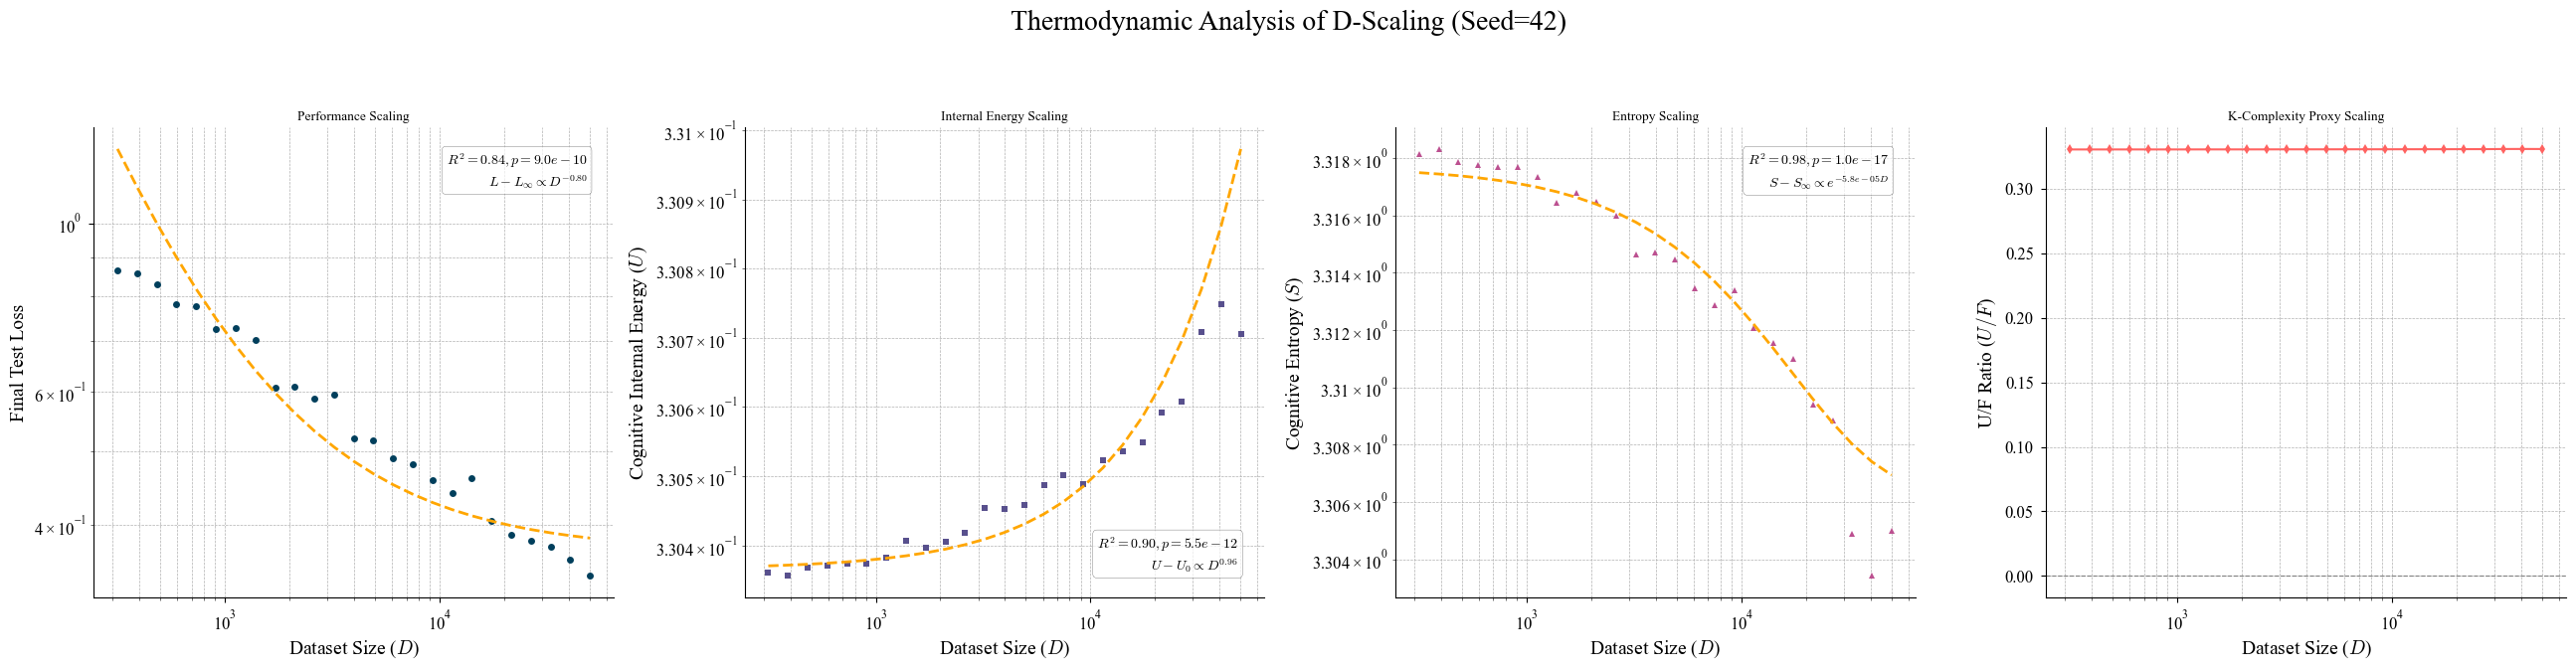

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import linregress
import torch
import os

if __name__ == '__main__':
    tasks = [(EXPERIMENT_CONFIG['seed'], d, EXPERIMENT_CONFIG, 0 if torch.cuda.is_available() else -1) for d in EXPERIMENT_CONFIG['d_values']]
    results = []
    for task_args in tqdm(tasks, desc=f"Running D-Scaling (Seed {EXPERIMENT_CONFIG['seed']}, Epochs {EXPERIMENT_CONFIG['epochs']})"):
        result = run_training_task(task_args)
        if result: results.append(result)
    
    if not results:
        print("No results were generated. Please check the setup.")
    else:
        df = pd.DataFrame(results).sort_values('data_size_d')

        # --- Calculate Reducible Metrics (Correct Original Logic) ---
        n_est = EXPERIMENT_CONFIG['num_points_for_baseline_estimation']
        L_inf = df['final_test_loss'].tail(n_est).mean()
        df['reducible_loss'] = df['final_test_loss'] - L_inf
        U_0 = df['final_U'].head(n_est).mean()
        df['reducible_U'] = df['final_U'] - U_0
        S_inf = df['final_S'].tail(n_est).mean()
        df['reducible_S'] = df['final_S'] - S_inf
        df['U_F_ratio'] = df['final_U'] / df['final_F']

        # --- Visualization (Conference Style) ---
        plt.style.use('seaborn-v0_8-paper')
        plt.rcParams.update({
            'font.family': 'serif', 'font.serif': ['Times New Roman'],
            'axes.labelsize': 14, 'xtick.labelsize': 12, 'ytick.labelsize': 12,
            'legend.fontsize': 12, 'figure.titlesize': 20, 'mathtext.fontset': 'cm'
        })

        fig, axes = plt.subplots(1, 4, figsize=(26, 6.5))
        fig.suptitle(f'Thermodynamic Analysis of D-Scaling (Seed={EXPERIMENT_CONFIG["seed"]})', y=1.03)

        x_d = df['data_size_d'].values
        colors = {'loss': '#003f5c', 'U': '#58508d', 'S': '#bc5090', 'ratio': '#ff6361', 'fit': '#ffa600'}
        
        # --- Fitting Functions ---
        def power_law_fit(x, y):
            mask = (y > 0) & (x > 0) & np.isfinite(y) & np.isfinite(x)
            if mask.sum() < 2: return 0, 1, 0, np.full_like(x, np.nan, dtype=float)
            log_x, log_y = np.log10(x[mask]), np.log10(y[mask])
            s, i, r, p, _ = linregress(log_x, log_y); r2 = r**2
            return r2, p, s, 10**(s*np.log10(x)+i)
        
        def exp_decay_fit(x, y):
            mask = (y > 0) & (x > 0) & np.isfinite(y) & np.isfinite(x)
            if mask.sum() < 2: return 0, 1, 0, np.full_like(x, np.nan, dtype=float)
            log_y = np.log(y[mask])
            slope, intercept, r, p, _ = linregress(x[mask], log_y);
            r2 = r**2
            decay_rate = -slope
            fit = np.exp(slope * x + intercept)
            return r2, p, decay_rate, fit

        # Plot 1: Loss Trend
        r2, p, s, fit = power_law_fit(x_d, df['reducible_loss'])
        axes[0].plot(x_d, df['final_test_loss'], 'o', color=colors['loss'], markersize=5)
        axes[0].plot(x_d, fit + L_inf, '--', color=colors['fit'], lw=2)
        axes[0].set_title('Performance Scaling')
        axes[0].set_ylabel('Final Test Loss')
        axes[0].text(0.95, 0.95, f'$R^2={r2:.2f}, p={p:.1e}$\n$L-L_\infty \propto D^{{{s:.2f}}}$', ha='right', va='top', transform=axes[0].transAxes, bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

        # Plot 2: Cognitive Internal Energy (U) Trend
        r2, p, s, fit = power_law_fit(x_d, df['reducible_U'])
        axes[1].plot(x_d, df['final_U'], 's', color=colors['U'], markersize=5)
        axes[1].plot(x_d, fit + U_0, '--', color=colors['fit'], lw=2)
        axes[1].set_title('Internal Energy Scaling')
        axes[1].set_ylabel('Cognitive Internal Energy ($U$)')
        axes[1].text(0.95, 0.05, f'$R^2={r2:.2f}, p={p:.1e}$\n$U-U_0 \propto D^{{{s:.2f}}}$', ha='right', va='bottom', transform=axes[1].transAxes, bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

        # Plot 3: Cognitive Entropy (S) Trend - Scatter points, fit curve only
        r2, p, decay_rate, fit = exp_decay_fit(x_d, df['reducible_S'])
        axes[2].plot(x_d, df['final_S'], '^', color=colors['S'], markersize=5, linestyle='None') # MODIFIED HERE
        axes[2].plot(x_d, fit + S_inf, '--', color=colors['fit'], lw=2)
        axes[2].set_title('Entropy Scaling')
        axes[2].set_ylabel('Cognitive Entropy ($S$)')
        axes[2].text(0.95, 0.95, f'$R^2={r2:.2f}, p={p:.1e}$\n$S-S_\infty \propto e^{{-{decay_rate:.1e}D}}$', ha='right', va='top', transform=axes[2].transAxes, bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))

        # Plot 4: U/F Ratio Trend
        axes[3].plot(x_d, df['U_F_ratio'], 'd-', color=colors['ratio'], markersize=5, lw=1.5)
        axes[3].set_title('K-Complexity Proxy Scaling')
        axes[3].set_ylabel(r'U/F Ratio ($U / F$)')
        axes[3].axhline(0, color='grey', linestyle='--', linewidth=0.8)

        # --- Final Formatting ---
        for ax in axes:
            ax.set_xlabel('Dataset Size ($D$)')
            ax.set_xscale('log')
            ax.grid(True, which='both', linestyle='--', linewidth=0.5)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
        
        axes[0].set_yscale('log'); axes[1].set_yscale('log'); axes[2].set_yscale('log'); axes[3].set_yscale('linear')

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        
        # --- Save results ---
        output_dir = 'results_final'
        os.makedirs(output_dir, exist_ok=True)
        file_prefix = f"d_scaling_final_seed_{EXPERIMENT_CONFIG['seed']}_epochs_{EXPERIMENT_CONFIG['epochs']}"
        output_img_path = os.path.join(output_dir, f"{file_prefix}.png")
        output_csv_path = os.path.join(output_dir, f"{file_prefix}.csv")
        
        plt.savefig(output_img_path, dpi=300, bbox_inches='tight')
        df.to_csv(output_csv_path, index=False)
        
        print(f"Plot saved to: {output_img_path}")
        print(f"Experiment data saved to: {output_csv_path}")
        
        plt.show()
